## **About the FYP**

### Age & Gender Prediction from Facial Images: A Bias-Aware Deep Learning Approach for Personalized User Experiences

Age and gender prediction from facial images is widely used in areas such as personalized marketing, security, and healthcare. However, current models suffer from:

**Bias in datasets:** Most datasets are dominated by certain demographics, leading to unfair predictions.

**Inaccuracies in real-world applications:** Deep learning models struggle with varying lighting, angles, and ethnic diversity.

**Limited generalization:** Models often perform well on benchmark datasets but fail in real-world scenarios.

### Installing Relevant Libraries

In [1]:
import torch

if torch.cuda.is_available():
    print("GPU is available.")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is NOT available.")


GPU is NOT available.


In [2]:
!pip install polars

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install torchviz


Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install torch torchvision

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118
  Obtaining dependency information for torchaudio from https://download.pytorch.org/whl/cu118/torchaudio-2.7.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata (6.8 kB)
  Obtaining dependency information for torch from https://download.pytorch.org/whl/cu118/torch-2.7.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata (29 kB)
Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.7.0%2Bcu118-cp311-cp311-win_amd64.whl (4.1 MB)
   ---------------------------------------- 0.0/2.9 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 GB ? eta -:--:--
   ---------------------------------------- 0.0/2.9 GB ? eta -:--:--
   ---

ERROR: Exception:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\http\client.py", line 466, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^^^^^^^^^^^^^^^

   ---------------------------------------- 0.0/2.9 GB 63.0 kB/s eta 12:48:41
   ---------------------------------------- 0.0/2.9 GB 63.0 kB/s eta 12:48:41
   ---------------------------------------- 0.0/2.9 GB 63.0 kB/s eta 12:48:08
   ---------------------------------------- 0.0/2.9 GB 63.0 kB/s eta 12:48:08
   ---------------------------------------- 0.0/2.9 GB 63.5 kB/s eta 12:41:51
   ---------------------------------------- 0.0/2.9 GB 63.5 kB/s eta 12:41:51
   ---------------------------------------- 0.0/2.9 GB 63.5 kB/s eta 12:41:51
   ---------------------------------------- 0.0/2.9 GB 63.5 kB/s eta 12:41:51
   ---------------------------------------- 0.0/2.9 GB 63.9 kB/s eta 12:37:04
   ---------------------------------------- 0.0/2.9 GB 63.9 kB/s eta 12:37:04
   ---------------------------------------- 0.0/2.9 GB 64.5 kB/s eta 12:30:35
   ---------------------------------------- 0.0/2.9 GB 64.5 kB/s eta 12:30:35
   ---------------------------------------- 0.0/2.9 GB 64.5 kB/s

In [6]:
!python -m ipykernel install --user --name torch_env --display-name "Python (torch_env)"

Installed kernelspec torch_env in C:\Users\DELL\AppData\Roaming\jupyter\kernels\torch_env


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [7]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable


### 1. Importing Libraries

In [8]:
import os
import re
import time
import random
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models, datasets
from PIL import Image
from sklearn.metrics import accuracy_score
from torchvision.models import resnet18, ResNet18_Weights
from collections import defaultdict, Counter
import zipfile
from torch.cuda.amp import GradScaler, autocast
from torchvision.models import VGG16_Weights
from torchvision.models import Inception_V3_Weights
import gradio as gr
import numpy as np

### 2. Configuration & Hyperparameters

In [44]:
data_dir = r"C:\Users\DELL\Desktop/Images Dataset"
batch_size = 32
epochs = 10
learning_rate = 0.001
image_size = (224, 224)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Display each value
print("Data Directory:", data_dir)
print("Batch Size:", batch_size)
print("Epochs:", epochs)
print("Learning Rate:", learning_rate)
print("Image Size:", image_size)
print("Device:", device)

Data Directory: C:\Users\DELL\Desktop/Images Dataset
Batch Size: 32
Epochs: 10
Learning Rate: 0.001
Image Size: (224, 224)
Device: cpu


In [45]:
import torch
print(torch.__version__)

2.7.0+cpu


### 3. Custom Dataset Class

In [46]:
class CustomImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        
        # List all image files in the directory
        self.image_files = [f for f in os.listdir(root_dir) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp'))]
        
    def __len__(self):
        return len(self.image_files)



    def __getitem__(self, idx):
        # Load the image
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name).convert('RGB')
        
        # Apply transform if available
        if self.transform:
            image = self.transform(image)
        
        # Extract gender and age from filename
        filename = os.path.basename(img_name)
        parts = filename.split("_")
        
        gender = int(parts[0])  # 0 = Male, 1 = Female
        
        age_range = parts[1].split('-')[0]  # e.g. '1' from '1-10'
        age_label = int(age_range)  # or map to a class if you use age brackets
        
        return image, gender, age_label

# Apply any necessary transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Initialize your custom dataset
dataset = CustomImageDataset(root_dir=r'C:\Users\DELL\Desktop/Images Dataset', transform=transform)

# You can now use this dataset with a DataLoader
from torch.utils.data import DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Iterate through the data_loader to print filenames and labels
for images, genders, ages in data_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Genders: {genders}")
    print(f"Ages: {ages}")
    
    break  # Just print one batch for debugging


Batch of images shape: torch.Size([32, 3, 224, 224])
Genders: tensor([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 0])
Ages: tensor([51, 21, 31, 31, 71, 11, 21,  0, 31, 41, 21, 11, 21, 41, 21, 31, 31, 21,
        21, 31, 51, 41, 51, 51, 21, 41, 21, 21, 21, 31, 41, 31])


### 4. Batch of Image Visulization

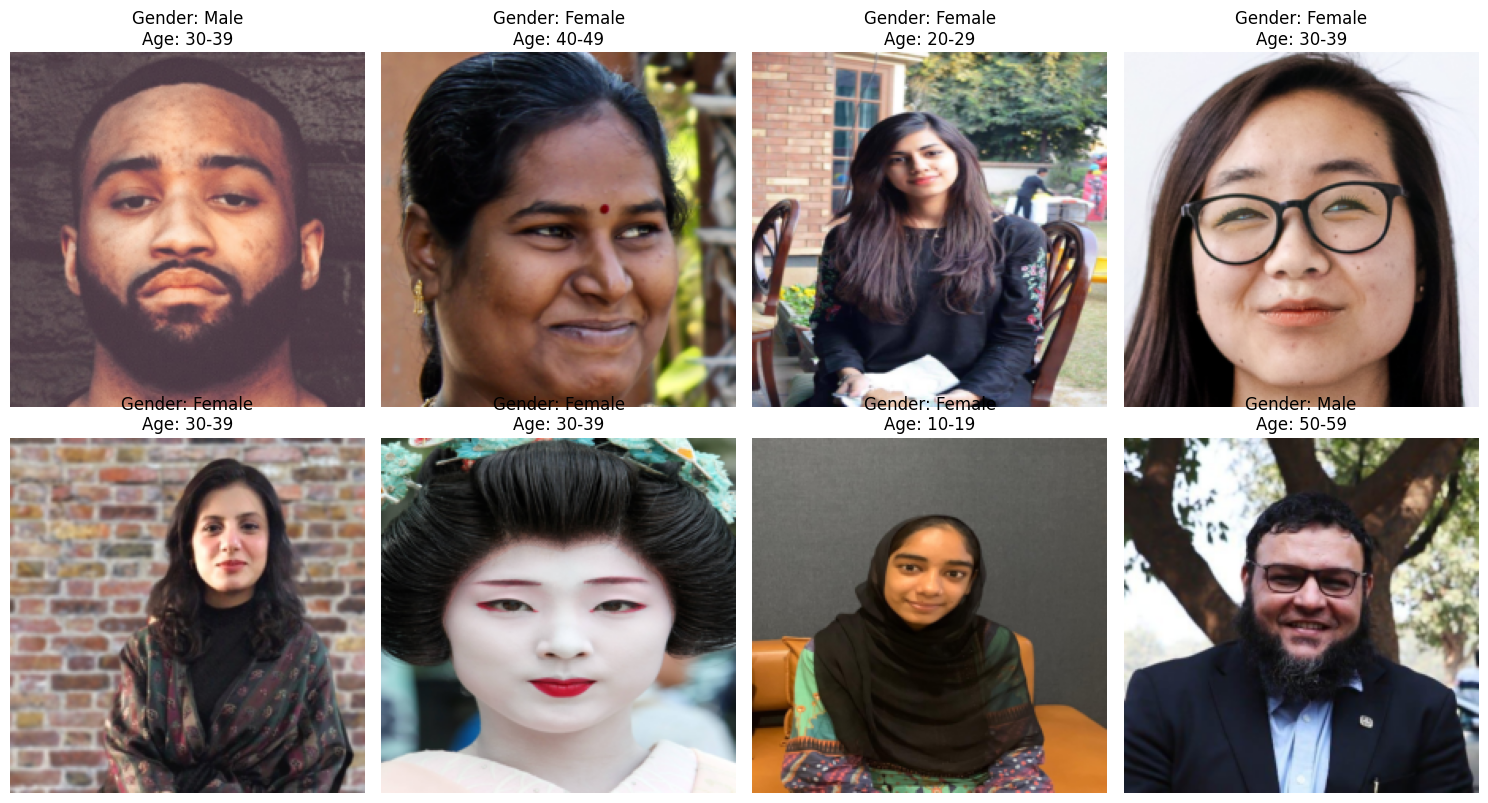

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Mapping for gender labels
gender_map = {0: 'Male', 1: 'Female'}

# Function to map age to age bracket (e.g., 0–9, 10–19, ..., 90–99)
def map_age_to_bracket(age):
    lower = (age // 10) * 10
    upper = lower + 9
    return f"{lower}-{upper}"

# Function to show a batch of images
def show_images(images, genders, ages):
    images = images.numpy()  # convert to numpy
    images = np.transpose(images, (0, 2, 3, 1))  # reshape for plotting (B, H, W, C)

    batch_size = images.shape[0]
    plt.figure(figsize=(15, 8))
    for i in range(min(batch_size, 8)):  # show up to 8 images
        plt.subplot(2, 4, i + 1)
        img = images[i]
        img = np.clip(img, 0, 1)  # make sure pixel values are valid
        plt.imshow(img)
        gender = gender_map[genders[i].item()]
        age_bracket = map_age_to_bracket(ages[i].item())
        plt.title(f"Gender: {gender}\nAge: {age_bracket}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Use the same batch to visualize
for images, genders, ages in data_loader:
    show_images(images, genders, ages)
    break  # Only visualize one batch


### 5. Distribution of Age Groups in the Dataset

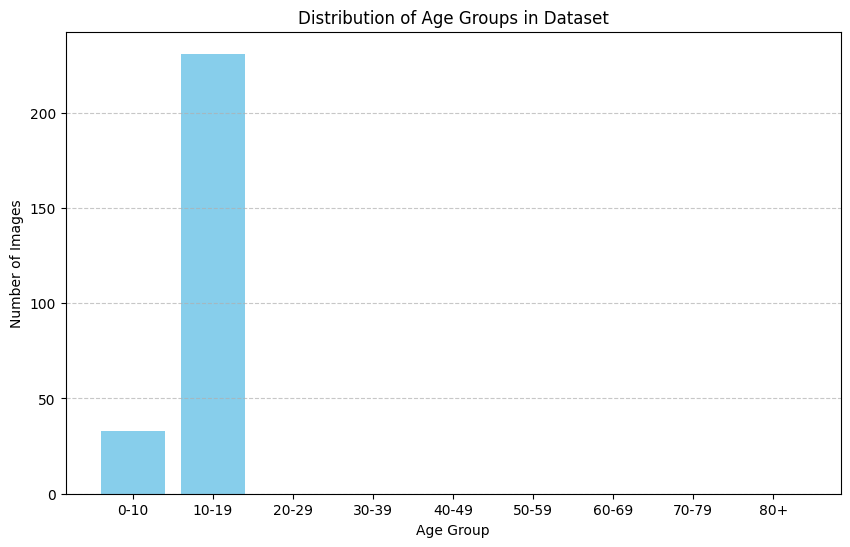

In [148]:
import matplotlib.pyplot as plt
from collections import Counter

# Define age brackets (labels)
age_brackets = ['0-10', '10-19', '20-29', '30-39','40-49', '50-59', '60-69', '70-79', '80+']

# Function to map age to bracket index
def get_age_bracket_index(age):
    if age < 1:
        return 0
    elif age < 10:
        return 1
    elif age < 20:
        return 2
    elif age < 30:
        return 3
    elif age < 40:
        return 4
    elif age < 50:
        return 5
    elif age < 60:
        return 6
    elif age < 70:
        return 7
    elif age < 80:
        return 8
    else:
        return 9

# Count samples in each bracket
age_counter = Counter()
for _, _, age in dataset:  # assuming third item is actual age (float or int)
    bracket_index = get_age_bracket_index(age)
    age_counter[bracket_index] += 1

# Prepare data for plotting
counts = [age_counter.get(i, 0) for i in range(len(age_brackets))]

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(age_brackets, counts, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Number of Images')
plt.title('Distribution of Age Groups in Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 6. Custom Dataset Class

In [147]:
class AgeGenderDataset(Dataset):
    def __init__(self, root_dir, transform=None, balance_classes=False):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.genders = []
        self.ages = []

        valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp')
        all_data = []

        for fname in os.listdir(root_dir):
            if fname.lower().endswith(valid_extensions):
                parts = fname.split("_")
                if len(parts) < 2:
                    print(f"Skipped (format issue): {fname}")
                    continue

                try:
                    gender = int(parts[0])  # Male = 0, Female = 1
                    age_range = parts[1].split('.')[0]  # remove extension
                    age_label = self.age_to_label(age_range)
                    path = os.path.join(root_dir, fname)
                    all_data.append((path, gender, age_label))
                except Exception as e:
                    print(f"Skipped (parsing issue): {fname} → {e}")
                    continue

        if not all_data:
            raise ValueError("No valid data found. Please check filenames and format.")

        if balance_classes:
            # Group by age label
            age_groups = defaultdict(list)
            for path, gender, age_label in all_data:
                age_groups[age_label].append((path, gender, age_label))

            # Filter out empty groups
            age_groups = {k: v for k, v in age_groups.items() if len(v) > 0}

            if not age_groups:
                raise ValueError("No age groups contain any data after parsing.")

            min_count = min(len(samples) for samples in age_groups.values())

            # Downsample to balance
            balanced_data = []
            for samples in age_groups.values():
                balanced_data.extend(random.sample(samples, min_count))

            random.shuffle(balanced_data)
            all_data = balanced_data

        for path, gender, age_label in all_data:
            self.image_paths.append(path)
            self.genders.append(gender)
            self.ages.append(age_label)

        # Equal weights for male and female
        self.gender_weights = torch.tensor([1.0, 1.0])

    def age_to_label(self, age_str):
        age_brackets = ['0-10', '10-19', '20-29', '30-39','40-49', '50-59', '60-69', '70-79', '80+']

        age_mapping = {
            '0-10': '0-9', '0-11': '0-9', '0-12': '0-9',
            '11-20': '10-19', '13-19': '10-19','20-30': '20-29','30-40': '30-39'
        }

        normalized_age = age_mapping.get(age_str, age_str)

        try:
            age = int(normalized_age)
        except ValueError:
            try:
                if '-' in normalized_age:
                    start, end = map(int, normalized_age.split('-'))
                    age = (start + end) // 2
                else:
                    raise ValueError
            except Exception:
                raise ValueError(f"Unrecognized age format: '{age_str}'")

        if age <= 9:
            return age_brackets.index('0-10')
        elif age <= 19:
            return age_brackets.index('10-19')
        elif age <= 29:
            return age_brackets.index('20-29')
        elif age <= 39:
            return age_brackets.index('30-39')
        elif age <= 49:
            return age_brackets.index('40-49')
        elif age <= 59:
            return age_brackets.index('50-59')
        elif age <= 69:
            return age_brackets.index('60-69')
        elif age <= 79:
            return age_brackets.index('70-79')
        else:
            return age_brackets.index('80+')

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("RGB")
        if self.transform:
            image = self.transform(image)

        # Get gender weight using tensor
        gender_weight = self.gender_weights[self.genders[idx]]

        return image, gender_weight, self.ages[idx]

# Initialize the dataset and apply a simple transform (resize, etc.)
dataset = AgeGenderDataset(root_dir=data_dir, transform=None, balance_classes=True)

# Print the number of images
print(f"Total images in the dataset: {len(dataset)}")

# Print the first sample (image path, gender, and age label)
image, gender_weight, age_label = dataset[0]
print(f"First image path: {dataset.image_paths[0]}")
print(f"Gender weight: {gender_weight}, Age label: {age_label}")

# If you want to print the distribution of genders and age groups
gender_counts = defaultdict(int)
age_counts = defaultdict(int)
for gender, age in zip(dataset.genders, dataset.ages):
    gender_counts[gender] += 1
    age_counts[age] += 1

print("Gender distribution (0: Male, 1: Female):", dict(gender_counts))
print("Age distribution:", dict(age_counts))

Total images in the dataset: 264
First image path: C:\Users\DELL\Desktop/Images Dataset\0_0-10_346.jpg.jpg
Gender weight: 1.0, Age label: 0
Gender distribution (0: Male, 1: Female): {0: 117, 1: 147}
Age distribution: {0: 33, 3: 33, 2: 33, 5: 33, 1: 33, 6: 33, 7: 33, 4: 33}


In [142]:
# Get all filenames in the dataset directory
image_files = [f for f in os.listdir(data_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp'))]

# Initialize counters
num_males = 0
num_females = 0

# Count based on gender code in the filename
for filename in image_files:
    gender_code = filename.split('_')[0]  # Get the first part before underscore
    if gender_code == '0':
        num_males += 1
    elif gender_code == '1':
        num_females += 1

# Print results
print(f"Total images: {len(image_files)}")
print(f"Number of male images: {num_males}")
print(f"Number of female images: {num_females}")


Total images: 756
Number of male images: 283
Number of female images: 473


In [143]:
# Number of males and females
num_males = 283
num_females = 473

# Total samples
total_samples = num_males + num_females

# Calculate weights for each gender
weight_male = total_samples / num_males
weight_female = total_samples / num_females

# Print weights
print(f"Weight for males: {weight_male}")
print(f"Weight for females: {weight_female}")


Weight for males: 2.6713780918727914
Weight for females: 1.5983086680761098


In [149]:
import torch

# Define age brackets
age_brackets = ['0-10', '10-19', '20-29', '30-39','40-49', '50-59', '60-69', '70-79', '80+']

# Calculate the number of brackets
num_brackets = len(age_brackets)

# Assign equal weights to each age bracket # Since we want equal weight, each one is assigned 1.0
weights = torch.tensor([1.0] * num_brackets)

# Print results
for age, weight in zip(age_brackets, weights):
    print(f"Age Bracket: {age}, Weight: {weight}")


Age Bracket: 0-10, Weight: 1.0
Age Bracket: 10-19, Weight: 1.0
Age Bracket: 20-29, Weight: 1.0
Age Bracket: 30-39, Weight: 1.0
Age Bracket: 40-49, Weight: 1.0
Age Bracket: 50-59, Weight: 1.0
Age Bracket: 60-69, Weight: 1.0
Age Bracket: 70-79, Weight: 1.0
Age Bracket: 80+, Weight: 1.0


In [150]:
# Define the image directory
root_dir = data_dir  

# Get the image paths
image_paths = []
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp')
for fname in os.listdir(root_dir):
    if fname.lower().endswith(valid_extensions):
        path = os.path.join(root_dir, fname)
        image_paths.append(path)

# Assign weights (same as before)
weight_male = 1.0
weight_female = 1.0
weights = torch.tensor([weight_male, weight_female])

# Print the tensor of weights
print("Tensor weights:", weights)

# Print the number of images in the dataset
print("Number of images in the dataset:", len(image_paths))


Tensor weights: tensor([1., 1.])
Number of images in the dataset: 756


### 7. Data Transformations

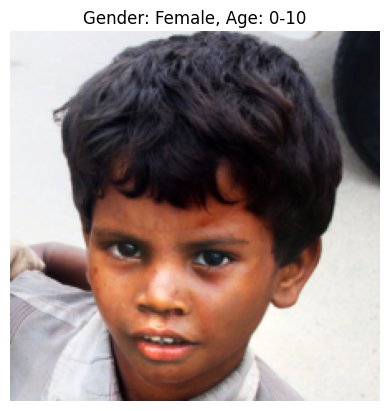

Transformed Tensor Stats:
Shape: torch.Size([3, 224, 224])
Min: -2.1008, Max: 2.5703
Mean per channel: ['0.2385', '0.0671', '0.2276']


In [151]:
image_size = (224, 224)
age_brackets = ['0-10', '10-19', '20-29', '30-39','40-49', '50-59', '60-69', '70-79', '80+']

# 2. Define Transformations
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# 3. Load one sample using the dataset
dataset = AgeGenderDataset(root_dir=data_dir, transform=transform)
sample_img, gender_raw, age_label = dataset[0]

# 4. Decode gender and age
gender = "Male" if gender_raw == 0 else "Female"
age_str = age_brackets[age_label]
if age_str == '0-1':
    age_display = "0–1 yrs (≈ 0–108 months)"
else:
    age_display = age_str

# 5. Function to unnormalize and show image
def imshow(img_tensor, gender, age_display):
    img_tensor = img_tensor.numpy().transpose((1, 2, 0))  # CHW → HWC
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img_tensor + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.title(f"Gender: {gender}, Age: {age_display}")
    plt.axis("off")
    plt.show()

# 6. Display image and stats
imshow(sample_img, gender, age_display)

print("Transformed Tensor Stats:")
print(f"Shape: {sample_img.shape}")
print(f"Min: {sample_img.min():.4f}, Max: {sample_img.max():.4f}")
means = [sample_img[i].mean().item() for i in range(3)]
print("Mean per channel:", [f"{m:.4f}" for m in means])


### 8. Data Loaders

Loaded 756 images.
Batch of images shape: torch.Size([32, 3, 224, 224])
Ages: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
Genders: tensor([1, 5, 0, 2, 5, 3, 3, 4, 2, 0, 1, 2, 6, 4, 0, 1, 3, 7, 0, 2, 5, 3, 2, 0,
        2, 4, 6, 2, 0, 3, 2, 2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].


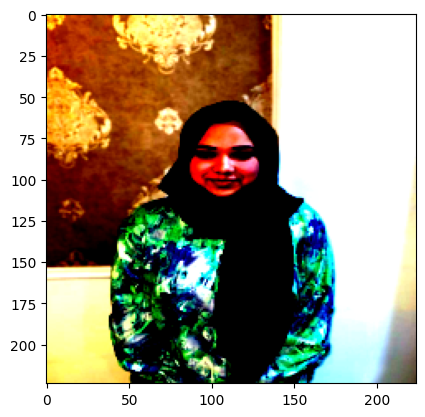

In [152]:
import matplotlib.pyplot as plt
dataset = AgeGenderDataset(data_dir, transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
print(f"Loaded {len(dataset)} images.")
# Iterate through the data_loader and print out a sample batch
for images, ages, genders in dataloader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Ages: {ages}")
    print(f"Genders: {genders}")
    img = images[0].permute(1, 2, 0).numpy()  # Reorder dimensions for displaying
    plt.imshow(img)
    plt.show()
    break
    

### 11. Evaluation Metrics on Entire Dataset Before Runing Pretrained Models

In [154]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Example age brackets
age_brackets = ['0-10', '10-19', '20-29', '30-39','40-49', '50-59', '60-69', '70-79', '80+']

# === Replace this with your actual dataset ===
# For demo, we'll simulate a dataset with 100 items
class DummyDataset(torch.utils.data.Dataset):
    def __init__(self, num_samples=100):
        self.num_samples = num_samples

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        image = torch.randn(3, 224, 224)  # Simulated image tensor
        gender = torch.randint(0, 2, (1,)).item()  # 0 or 1
        age_bracket = torch.randint(0, len(age_brackets), (1,)).item()
        return image, gender, age_bracket

dataset = DummyDataset()

# Create DataLoader for entire dataset
eval_loader = DataLoader(dataset, batch_size=32, shuffle=False)

# Collect true and predicted labels
true_genders = []
pred_genders = []

true_ages = []
pred_ages = []

print(f"✅ Dataset contains {len(dataset)} samples.")

for batch in eval_loader:
    try:
        images, gender_labels, age_labels = batch
        
        # Simulated predictions (replace with model inference later)
        simulated_gender_preds = torch.randint(0, 2, (len(gender_labels),))  # Binary: 0 or 1
        simulated_age_preds = torch.randint(0, len(age_brackets), (len(age_labels),))  # Age bracket index

        true_genders.extend(gender_labels)
        pred_genders.extend(simulated_gender_preds.tolist())

        true_ages.extend(age_labels)
        pred_ages.extend(simulated_age_preds.tolist())
    
    except Exception as e:
        print(f"❌ Error processing batch: {e}")

# =====================
# 📊 Gender Evaluation
# =====================
print("\n--- Gender Classification ---")
print("Accuracy:", accuracy_score(true_genders, pred_genders))
print("Confusion Matrix:\n", confusion_matrix(true_genders, pred_genders))
print("Classification Report:\n", classification_report(true_genders, pred_genders, target_names=["Male", "Female"]))

# =====================
# 📊 Age Group Evaluation
# =====================
print("\n--- Age Group Classification ---")
print("Accuracy:", accuracy_score(true_ages, pred_ages))
print("Confusion Matrix:\n", confusion_matrix(true_ages, pred_ages))
print("Classification Report:\n", classification_report(true_ages, pred_ages, target_names=age_brackets))


✅ Dataset contains 100 samples.

--- Gender Classification ---
Accuracy: 0.51
Confusion Matrix:
 [[22 29]
 [20 29]]
Classification Report:
               precision    recall  f1-score   support

        Male       0.52      0.43      0.47        51
      Female       0.50      0.59      0.54        49

    accuracy                           0.51       100
   macro avg       0.51      0.51      0.51       100
weighted avg       0.51      0.51      0.51       100


--- Age Group Classification ---
Accuracy: 0.12
Confusion Matrix:
 [[0 3 2 0 2 1 1 0 1]
 [1 3 2 1 1 0 1 2 1]
 [2 2 0 1 0 0 1 0 2]
 [0 0 1 3 0 2 1 2 5]
 [1 2 1 0 1 1 2 2 2]
 [0 2 2 1 0 3 0 0 2]
 [0 0 1 0 1 0 0 2 3]
 [1 2 1 1 2 3 2 0 1]
 [1 2 1 0 2 0 4 2 2]]
Classification Report:
               precision    recall  f1-score   support

        0-10       0.00      0.00      0.00        10
       10-19       0.19      0.25      0.21        12
       20-29       0.00      0.00      0.00         8
       30-39       0.43      0.21 

### 9. Data Loaders

In [155]:
# Equal weights for 2 gender classes
class_weights = [1.0, 1.0]
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# Now use it in the loss function
import torch.nn as nn
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

outputs = torch.tensor([[2.0, 1.0], [0.5, 2.5]])  # shape: (batch_size, num_classes)
labels = torch.tensor([0, 1])                    # true class indices
# Compute the loss
loss = criterion(outputs, labels)
print("Loss:", loss.item())

Loss: 0.22009485960006714


### 10. Model Selection Function

In [156]:
# Split into Train and Test
from torch.utils.data import random_split
train_ratio = 0.8
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")

Training set size: 80
Test set size: 20


### 10. Loss Function & Optimizer

In [157]:
#### 7. Loss Functions and Optimizer

criterion_gender = nn.CrossEntropyLoss()
criterion_age = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print("Loss Functions & Optimizer setup complete!")
print(f"Gender Classification Loss: {criterion_gender}")
print(f"Age Classification Loss: {criterion_age}")
print(f"Optimizer: {optimizer}")


Loss Functions & Optimizer setup complete!
Gender Classification Loss: CrossEntropyLoss()
Age Classification Loss: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


### 11. Model Class Defination using MultitaskResNet

In [158]:
class MultiTaskResNet(nn.Module):
    def __init__(self, base_model, num_gender_classes=2, num_age_classes=10):
        super(MultiTaskResNet, self).__init__()
        self.backbone = nn.Sequential(*list(base_model.children())[:-1])
        self.age_head = nn.Linear(base_model.fc.in_features, num_age_classes)
        self.gender_head = nn.Linear(base_model.fc.in_features, num_gender_classes)

    def forward(self, x):
        features = self.backbone(x)
        features = features.view(features.size(0), -1)
        age_output = self.age_head(features)
        gender_output = self.gender_head(features)
        return age_output, gender_output

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained ResNet and wrap it
base_model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
model = MultiTaskResNet(base_model).to(device)

# Define the loss functions
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Dummy input to simulate a batch of images (e.g., batch size = 4, 3 color channels, 224x224 size)
dummy_input = torch.randn(4, 3, 224, 224).to(device)

# Forward pass through the model
age_output, gender_output = model(dummy_input)


# Print output shapes
print("Age output shape:", age_output.shape)       # Should be [4] if squeezed, or [4, 9] if not
print("Gender output shape:", gender_output.shape) # Should be [4, 2]


Age output shape: torch.Size([4, 10])
Gender output shape: torch.Size([4, 2])


### 12. Training and Validation Class for Training Purpose

In [159]:
import time
import torch

def train_and_validate(model, age_criterion, gender_criterion, optimizer, train_loader, test_loader, epochs=5):
    start_time = time.time()
    history = []

    for epoch in range(epochs):
        print(f"\nEpoch: {epoch + 1}/{epochs}")
        model.train()
        train_loss, train_acc_age, train_acc_gender = 0.0, 0.0, 0.0

        for inputs, gender_labels, age_labels in train_loader:
            inputs = inputs.to(device)
            gender_labels = gender_labels.to(device).long()
            age_labels = age_labels.to(device).long()

            optimizer.zero_grad()
            age_outputs, gender_outputs = model(inputs)

            age_loss = age_criterion(age_outputs, age_labels)
            gender_loss = gender_criterion(gender_outputs, gender_labels)

            loss = age_loss + gender_loss
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * inputs.size(0)

            # Accuracy: Age
            _, age_preds = torch.max(age_outputs, 1)
            train_acc_age += (age_preds == age_labels).sum().item()

            # Accuracy: Gender
            _, gender_preds = torch.max(gender_outputs, 1)
            train_acc_gender += (gender_preds == gender_labels).sum().item()

        avg_train_loss = train_loss / len(train_loader.dataset)
        avg_train_acc_age = train_acc_age / len(train_loader.dataset)
        avg_train_acc_gender = train_acc_gender / len(train_loader.dataset)

        # Validation
        model.eval()
        valid_loss, valid_acc_age, valid_acc_gender = 0.0, 0.0, 0.0
        with torch.no_grad():
            for inputs, gender_labels, age_labels in test_loader:
                inputs = inputs.to(device)
                age_labels = age_labels.to(device)
                gender_labels = gender_labels.to(device).long()

                age_outputs, gender_outputs = model(inputs)
                age_loss = age_criterion(age_outputs, age_labels)
                gender_loss = gender_criterion(gender_outputs, gender_labels)

                loss = age_loss + gender_loss
                valid_loss += loss.item() * inputs.size(0)

                _, age_preds = torch.max(age_outputs, 1)
                valid_acc_age += (age_preds == age_labels).sum().item()

                _, gender_preds = torch.max(gender_outputs, 1)
                valid_acc_gender += (gender_preds == gender_labels).sum().item()

        avg_valid_loss = valid_loss / len(test_loader.dataset)
        avg_valid_acc_age = valid_acc_age / len(test_loader.dataset)
        avg_valid_acc_gender = valid_acc_gender / len(test_loader.dataset)

        history.append([
            avg_train_loss, avg_valid_loss,
            avg_train_acc_age, avg_valid_acc_age,
            avg_train_acc_gender, avg_valid_acc_gender
        ])

        print(f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_valid_loss:.4f}")
        print(f"Train Age Acc: {avg_train_acc_age:.4f}, Val Age Acc: {avg_valid_acc_age:.4f}")
        print(f"Train Gender Acc: {avg_train_acc_gender:.4f}, Val Gender Acc: {avg_valid_acc_gender:.4f}")

    print(f"\nTraining completed in {(time.time() - start_time):.2f}s")
    return model, history
model, history = train_and_validate( model, age_criterion, gender_criterion, optimizer, train_loader, test_loader, epochs=5)


Epoch: 1/5
Train Loss: 3.0000, Val Loss: 3.0044
Train Age Acc: 0.0625, Val Age Acc: 0.0500
Train Gender Acc: 0.5875, Val Gender Acc: 0.3500

Epoch: 2/5
Train Loss: 3.2156, Val Loss: 2.9353
Train Age Acc: 0.0875, Val Age Acc: 0.2000
Train Gender Acc: 0.5125, Val Gender Acc: 0.5500

Epoch: 3/5
Train Loss: 3.0845, Val Loss: 3.5719
Train Age Acc: 0.0625, Val Age Acc: 0.0000
Train Gender Acc: 0.6500, Val Gender Acc: 0.3500

Epoch: 4/5
Train Loss: 3.4407, Val Loss: 3.8210
Train Age Acc: 0.1125, Val Age Acc: 0.1000
Train Gender Acc: 0.5000, Val Gender Acc: 0.3500

Epoch: 5/5
Train Loss: 3.4126, Val Loss: 3.0974
Train Age Acc: 0.1500, Val Age Acc: 0.2000
Train Gender Acc: 0.5250, Val Gender Acc: 0.5500

Training completed in 196.72s


In [160]:
# Check for incorrect labels
print("Unique Age Labels in Dataset:", set(age_labels.cpu().numpy()))

Unique Age Labels in Dataset: {np.int64(0), np.int64(1), np.int64(4)}


## 13. Pretrained Models

### resnet50

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Define the modified ResNet-50 model with two heads (age and gender)
class ResNet50DualHead(nn.Module):
    def __init__(self, num_age_classes=10, num_gender_classes=2):
        super(ResNet50DualHead, self).__init__()
        self.base_model = models.resnet50(pretrained=True)
        
        # Freeze the base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Replace the fully connected layer for both age and gender classification
        self.base_model.fc = nn.Identity()  # Remove the existing FC layer

        # Age head (classifier)
        self.age_head = nn.Linear(2048, num_age_classes)
        
        # Gender head (classifier)
        self.gender_head = nn.Linear(2048, num_gender_classes)

    def forward(self, x):
        features = self.base_model(x)  # Extract features
        features = features.view(features.size(0), -1)  # Flatten the output
        
        # Age and Gender predictions
        age_logits = self.age_head(features)
        gender_logits = self.gender_head(features)
        
        return age_logits, gender_logits

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = ResNet50DualHead(num_age_classes=10, num_gender_classes=2).to(device)

# Define criterion and optimizer
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training function (same as provided)
model, history = train_and_validate(model, age_criterion, gender_criterion, optimizer, train_loader, test_loader, epochs=5)


C:\Users\DELL\.conda\envs\tf-jupyter\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\DELL\.conda\envs\tf-jupyter\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\DELL/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [09:03<00:00, 189kB/s]



Epoch: 1/5
Train Loss: 3.0360, Val Loss: 2.9993
Train Age Acc: 0.0750, Val Age Acc: 0.0500
Train Gender Acc: 0.5250, Val Gender Acc: 0.6500

Epoch: 2/5
Train Loss: 3.0334, Val Loss: 2.9923
Train Age Acc: 0.1500, Val Age Acc: 0.0500
Train Gender Acc: 0.5000, Val Gender Acc: 0.5500

Epoch: 3/5
Train Loss: 3.0871, Val Loss: 3.0531
Train Age Acc: 0.0625, Val Age Acc: 0.1000
Train Gender Acc: 0.4375, Val Gender Acc: 0.2000

Epoch: 4/5
Train Loss: 3.0434, Val Loss: 2.9713
Train Age Acc: 0.1125, Val Age Acc: 0.1000
Train Gender Acc: 0.5500, Val Gender Acc: 0.4000

Epoch: 5/5
Train Loss: 3.0621, Val Loss: 3.0468
Train Age Acc: 0.1250, Val Age Acc: 0.0500
Train Gender Acc: 0.5000, Val Gender Acc: 0.6000

Training completed in 139.06s


In [70]:
torch.save(model.state_dict(), 'age_classifier.pth')

In [71]:
# Define the checkpoint path
checkpoint_path = "resnet50_checkpoint.pth"

# Save the model, optimizer, and history
torch.save({
    'epoch': epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': history
}, checkpoint_path)

print(f"Model saved successfully at {checkpoint_path}")


Model saved successfully at resnet50_checkpoint.pth


In [72]:
# Load the checkpoint
checkpoint = torch.load("resnet50_checkpoint.pth")

# Load model and optimizer state
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
history = checkpoint['history']
print(f"Model and optimizer loaded successfully from resnet50_checkpoint.pth")


Model and optimizer loaded successfully from resnet50_checkpoint.pth


In [79]:
# Save the state dict
torch.save(model.state_dict(), "resnet50_state_dict.pth")

In [74]:
# Make sure your model architecture is defined before loading
model = ResNet50DualHead()  # Initialize your model class
model.load_state_dict(torch.load("resnet50_state_dict.pth"))
model.eval()

ResNet50DualHead(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential

In [75]:
print(type(history))
print(history)

<class 'list'>
[[3.036045265197754, 2.9993362426757812, 0.075, 0.05, 0.525, 0.65], [3.033352756500244, 2.992337226867676, 0.15, 0.05, 0.5, 0.55], [3.0870615959167482, 3.053086757659912, 0.0625, 0.1, 0.4375, 0.2], [3.0434436321258547, 2.971250295639038, 0.1125, 0.1, 0.55, 0.4], [3.0620742797851563, 3.0467967987060547, 0.125, 0.05, 0.5, 0.6]]


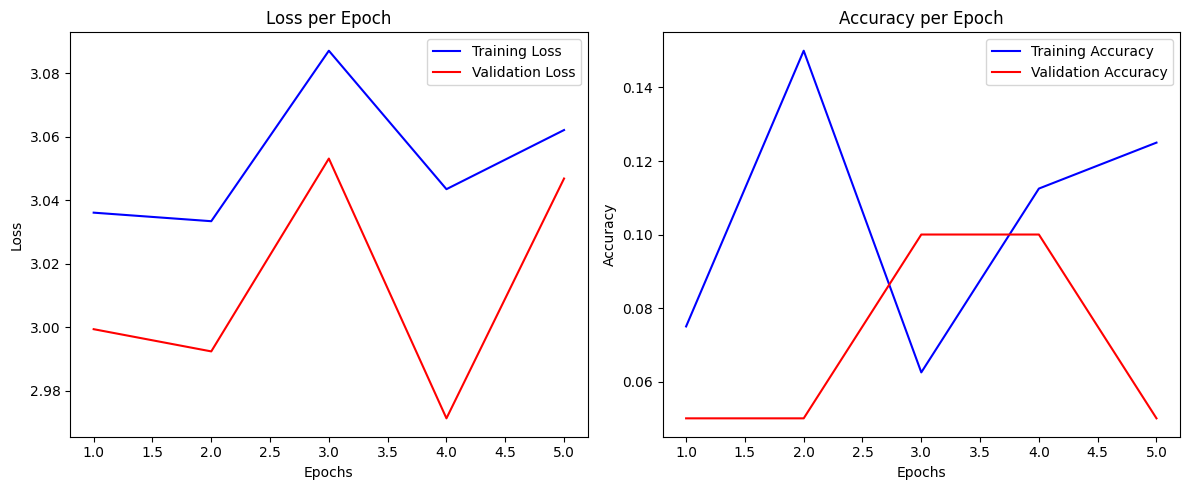

In [76]:
import matplotlib.pyplot as plt
import numpy as np

history = np.array(history)

train_loss = history[:, 0]
val_loss = history[:, 1]
train_acc = history[:, 2]
val_acc = history[:, 3]
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [80]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image
import torch.nn as nn
from torchvision import models

# =============================
# Define the Model Architecture
# =============================
class ResNet50DualHead(nn.Module):
    def __init__(self, num_age_classes=10, num_gender_classes=2):
        super(ResNet50DualHead, self).__init__()
        self.base_model = models.resnet50(pretrained=True)
        
        # Freeze the base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Replace the fully connected layer for both age and gender classification
        self.base_model.fc = nn.Identity()  # Remove the existing FC layer

        # Age head (classifier)
        self.age_head = nn.Linear(2048, num_age_classes)
        
        # Gender head (classifier)
        self.gender_head = nn.Linear(2048, num_gender_classes)

    def forward(self, x):
        features = self.base_model(x)  # Extract features
        features = features.view(features.size(0), -1)  # Flatten the output
        
        # Age and Gender predictions
        age_logits = self.age_head(features)
        gender_logits = self.gender_head(features)
        
        return age_logits, gender_logits

# =============================
# Initialize Model and Load Weights
# =============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet50DualHead(num_age_classes=10, num_gender_classes=2).to(device)

# Load the checkpoint
checkpoint = torch.load(r'C:\Users\DELL\resnet50_checkpoint.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# =============================
# Define Image Transformations
# =============================
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# =============================
# Load and Preprocess Image
# =============================
image_path = r'C:\Users\DELL\Downloads\test-image.jpg'  # Update with your image path
test_image = Image.open(image_path).convert('RGB')
img_tensor = transform(test_image)
batch_t = torch.unsqueeze(img_tensor, 0).to(device)

# Display the image
test_image.show()

# =============================
# Inference
# =============================
with torch.no_grad():
    age_logits, gender_logits = model(batch_t)

    # Age prediction
    age_probs = F.softmax(age_logits, dim=1)
    age_pred_idx = torch.argmax(age_probs).item()
    age_brackets = ['0-10', '10-19', '20-29', '30-39','40-49', '50-59', '60-69', '70-79', '80+']
    age_display = age_brackets[age_pred_idx]
    age_confidence = age_probs[0][age_pred_idx].item() * 100

    # Gender prediction
    gender_probs = F.softmax(gender_logits, dim=1)
    gender_pred_idx = torch.argmax(gender_probs).item()
    gender_display = "Male" if gender_pred_idx == 0 else "Female"
    gender_confidence = gender_probs[0][gender_pred_idx].item() * 100

# =============================
# Output the Results
# =============================
print(f"Predicted Age Bracket: {age_display} with Confidence: {age_confidence:.2f}%")
print(f"Predicted Gender: {gender_display} with Confidence: {gender_confidence:.2f}%")


Predicted Age Bracket: 20-29 with Confidence: 68.13%
Predicted Gender: Female with Confidence: 68.55%


### vgg16

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Define the modified VGG-16 model with two heads (age and gender)
class VGG16DualHead(nn.Module):
    def __init__(self, num_age_classes=10, num_gender_classes=2):
        super(VGG16DualHead, self).__init__()
        self.base_model = models.vgg16(pretrained=True)
        
        # Freeze the base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Replace the classifier with a custom head
        self.base_model.classifier = nn.Identity()  # Remove the existing classifier
        
        # Age head (classifier)
        self.age_head = nn.Sequential(
            nn.Linear(25088, 512),
            nn.ReLU(),
            nn.Dropout(0.01),
            nn.Linear(512, num_age_classes)
        )
        
        # Gender head (classifier)
        self.gender_head = nn.Sequential(
            nn.Linear(25088, 512),
            nn.ReLU(),
            nn.Dropout(0.01),
            nn.Linear(512, num_gender_classes)
        )

    def forward(self, x):
        features = self.base_model.features(x)  # Extract features
        features = features.view(features.size(0), -1)  # Flatten the output
        
        # Age and Gender predictions
        age_logits = self.age_head(features)
        gender_logits = self.gender_head(features)
        
        return age_logits, gender_logits

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = VGG16DualHead(num_age_classes=10, num_gender_classes=2).to(device)

# Define criterion and optimizer
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training function (same as provided)
model, history = train_and_validate(model, age_criterion, gender_criterion, optimizer, train_loader, test_loader, epochs=5)


C:\Users\DELL\.conda\envs\tf-jupyter\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Epoch: 1/5
Train Loss: 2.9973, Val Loss: 2.9828
Train Age Acc: 0.1250, Val Age Acc: 0.1000
Train Gender Acc: 0.4875, Val Gender Acc: 0.6000

Epoch: 2/5
Train Loss: 2.9890, Val Loss: 3.0827
Train Age Acc: 0.1625, Val Age Acc: 0.2000
Train Gender Acc: 0.5500, Val Gender Acc: 0.3500

Epoch: 3/5
Train Loss: 2.9871, Val Loss: 2.9427
Train Age Acc: 0.0625, Val Age Acc: 0.1500
Train Gender Acc: 0.5750, Val Gender Acc: 0.6500

Epoch: 4/5
Train Loss: 3.0127, Val Loss: 3.1036
Train Age Acc: 0.0625, Val Age Acc: 0.0000
Train Gender Acc: 0.5000, Val Gender Acc: 0.3500

Epoch: 5/5
Train Loss: 2.9627, Val Loss: 3.1104
Train Age Acc: 0.1625, Val Age Acc: 0.1000
Train Gender Acc: 0.5625, Val Gender Acc: 0.5500

Training completed in 378.20s


In [82]:
# Save the state dict
torch.save(model.state_dict(), "vgg16_age_gender_state_dict.pth")
print("State dict saved as vgg16_age_gender_state_dict.pth")

State dict saved as vgg16_age_gender_state_dict.pth


In [83]:
# Define the checkpoint path
checkpoint_path = "vgg16_checkpoint.pth"

# Save the model, optimizer, and history
torch.save({
    'epoch': 5,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': history
}, checkpoint_path)

print(f"Model saved successfully at {checkpoint_path}")

Model saved successfully at vgg16_checkpoint.pth


In [84]:
# Make sure your model architecture is defined before loading
model = VGG16DualHead()  # Initialize your model class
model.load_state_dict(torch.load("vgg16_age_gender_state_dict.pth"))
model.eval()

VGG16DualHead(
  (base_model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
 

In [85]:
# Print the type and content of history
print("Type of history:", type(history))
print("Contents of history:\n", history)

Type of history: <class 'list'>
Contents of history:
 [[2.997257661819458, 2.98284649848938, 0.125, 0.1, 0.4875, 0.6], [2.9890349388122557, 3.082676410675049, 0.1625, 0.2, 0.55, 0.35], [2.9871124744415285, 2.9427051544189453, 0.0625, 0.15, 0.575, 0.65], [3.012685489654541, 3.1035523414611816, 0.0625, 0.0, 0.5, 0.35], [2.962686061859131, 3.1103925704956055, 0.1625, 0.1, 0.5625, 0.55]]


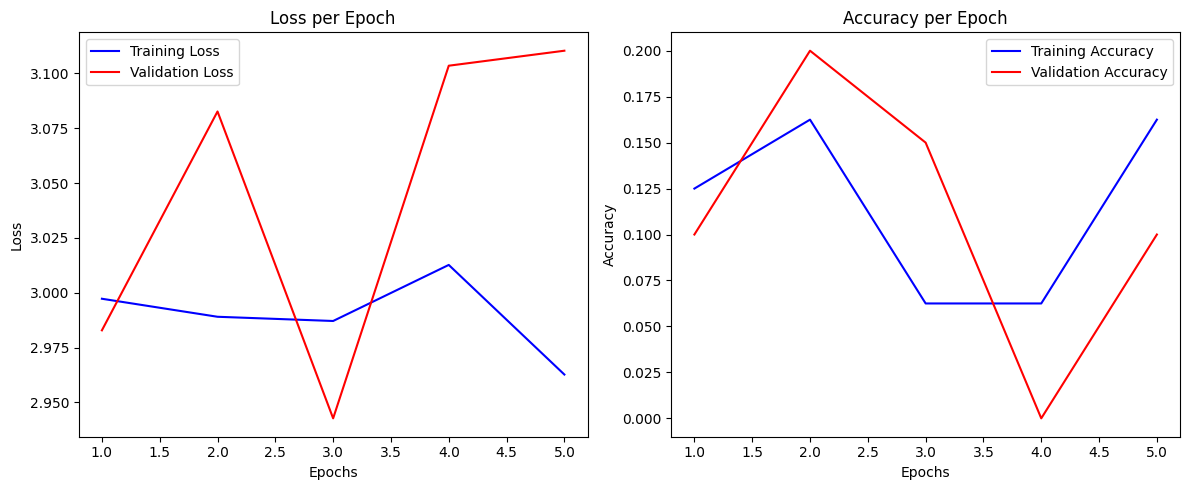

In [86]:
import matplotlib.pyplot as plt
import numpy as np

history = np.array(history)

train_loss = history[:, 0]
val_loss = history[:, 1]
train_acc = history[:, 2]
val_acc = history[:, 3]
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Mobilenet

In [173]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Define the modified MobileNetV2 model with two heads (age and gender)
class MobileNetV2DualHead(nn.Module):
    def __init__(self, num_age_classes=10, num_gender_classes=2):
        super(MobileNetV2DualHead, self).__init__()
        self.base_model = models.mobilenet_v2(pretrained=True)
        
        # Freeze the base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Replace the classifier with an identity layer
        self.base_model.classifier = nn.Identity()
        
        # Age head (classifier)
        self.age_head = nn.Sequential(
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(0.01),
            nn.Linear(512, num_age_classes)
        )
        
        # Gender head (classifier)
        self.gender_head = nn.Sequential(
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(0.01),
            nn.Linear(512, num_gender_classes)
        )

    def forward(self, x):
        features = self.base_model.features(x)  # Extract features
        features = nn.functional.adaptive_avg_pool2d(features, (1, 1))  # Global average pooling
        features = features.view(features.size(0), -1)  # Flatten the output
        
        # Age and Gender predictions
        age_logits = self.age_head(features)
        gender_logits = self.gender_head(features)
        
        return age_logits, gender_logits
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = MobileNetV2DualHead(num_age_classes=10, num_gender_classes=2).to(device)

# Define criterion and optimizer
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training function (same as provided)
model, history = train_and_validate(model, age_criterion, gender_criterion, optimizer, train_loader, test_loader, epochs=5)



Epoch: 1/5
Train Loss: 3.0048, Val Loss: 2.9755
Train Age Acc: 0.1125, Val Age Acc: 0.1000
Train Gender Acc: 0.5125, Val Gender Acc: 0.7000

Epoch: 2/5
Train Loss: 3.0174, Val Loss: 3.0223
Train Age Acc: 0.1250, Val Age Acc: 0.0000
Train Gender Acc: 0.4375, Val Gender Acc: 0.4000

Epoch: 3/5
Train Loss: 2.9652, Val Loss: 2.9949
Train Age Acc: 0.1000, Val Age Acc: 0.2000
Train Gender Acc: 0.5000, Val Gender Acc: 0.2000

Epoch: 4/5
Train Loss: 3.0001, Val Loss: 2.9734
Train Age Acc: 0.1250, Val Age Acc: 0.1000
Train Gender Acc: 0.4625, Val Gender Acc: 0.7000

Epoch: 5/5
Train Loss: 2.9624, Val Loss: 2.9876
Train Age Acc: 0.1875, Val Age Acc: 0.0000
Train Gender Acc: 0.5125, Val Gender Acc: 0.6500

Training completed in 44.98s


In [163]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [165]:
# Initialize the model
MobileNet_model = MobileNetV2DualHead(num_age_classes=10, num_gender_classes=2).to(device)

In [166]:
# Define criterion and optimizer
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [167]:
# Save the state dict
checkpoint_path = "mobilenetv2_dualhead_checkpoint.pth"
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': history
}, checkpoint_path)

print(f"Model and optimizer state saved to {checkpoint_path}")

Model and optimizer state saved to mobilenetv2_dualhead_checkpoint.pth


In [113]:
# Load the model
MobileNet_model.load_state_dict(torch.load('MobileNet_model.pth'))

<All keys matched successfully>

In [115]:
# Set to evaluation mode
MobileNet_model.eval()

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [168]:
# Print the type and content of history
print(f"Type of history: {type(history)}")
print(f"Content of history: {history}")

Type of history: <class 'list'>
Content of history: [[2.999957466125488, 3.0043678283691406, 0.0625, 0.05, 0.5875, 0.35], [3.2156060218811033, 2.9353442192077637, 0.0875, 0.2, 0.5125, 0.55], [3.084494876861572, 3.5718984603881836, 0.0625, 0.0, 0.65, 0.35], [3.440665578842163, 3.821009635925293, 0.1125, 0.1, 0.5, 0.35], [3.412598991394043, 3.0974416732788086, 0.15, 0.2, 0.525, 0.55]]


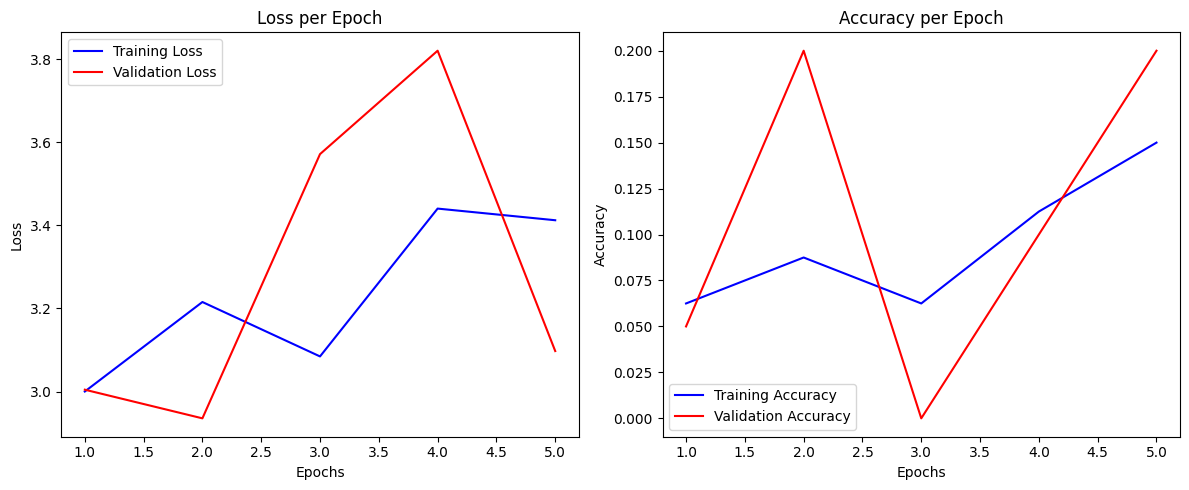

In [170]:
import matplotlib.pyplot as plt
import numpy as np

history = np.array(history)

train_loss = history[:, 0]
val_loss = history[:, 1]
train_acc = history[:, 2]
val_acc = history[:, 3]
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [175]:
import torch
import torch.nn.functional as F
from torchvision import models, transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Gender mapping (0 -> Male, 1 -> Female)
gender_map = {0: 'Male', 1: 'Female'}

# Function to map age index to age bracket
def map_age_to_bracket(age_idx):
    lower = age_idx * 10
    upper = lower + 9
    return f"{lower}-{upper}"

# Dual-output model based on MobileNetV2
class MobileNetV2DualHead(torch.nn.Module):
    def __init__(self):
        super(MobileNetV2DualHead, self).__init__()
        
        # Load pre-trained MobileNetV2
        base_model = models.mobilenet_v2(pretrained=True)
        self.features = base_model.features

        # Global Average Pooling
        self.avgpool = torch.nn.AdaptiveAvgPool2d((1, 1))

        # Gender head (2 classes)
        self.gender_head = torch.nn.Sequential(
            torch.nn.Dropout(0.01),
            torch.nn.Conv2d(1280, 2, kernel_size=1),
            torch.nn.Flatten()
        )

        # Age head (9 age brackets)
        self.age_head = torch.nn.Sequential(
            torch.nn.Dropout(0.01),
            torch.nn.Conv2d(1280, 9, kernel_size=1),
            torch.nn.Flatten()
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        gender_out = self.gender_head(x)
        age_out = self.age_head(x)
        return gender_out, age_out

# Preprocess image
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

# Prediction function
def predict(model, image_path):
    image = preprocess_image(image_path)
    model.eval()
    with torch.no_grad():
        gender_out, age_out = model(image)

        gender_probs = torch.softmax(gender_out, dim=1)
        age_probs = torch.softmax(age_out, dim=1)

        gender_idx = torch.argmax(gender_probs, dim=1).item()
        age_idx = torch.argmax(age_probs, dim=1).item()

        gender = gender_map[gender_idx]
        age_bracket = map_age_to_bracket(age_idx)

        gender_conf = gender_probs[0][gender_idx].item() * 100
        age_conf = age_probs[0][age_idx].item() * 100

    print(f"Predicted Gender: {gender}")
    print(f"Predicted Age: {age_bracket}")
    print(f"Gender Prediction Confidence: {gender_conf:.2f}%")
    print(f"Age Prediction Confidence: {age_conf:.2f}%")
    
# Initialize model
model = MobileNetV2DualHead()

# Load pretrained MobileNetV2 features only
pretrained_model = models.mobilenet_v2(pretrained=True)
model.features.load_state_dict(pretrained_model.features.state_dict())

# Predict
image_path = r'C:\Users\DELL\Downloads\test-image.jpg'  # Replace with your image path
predict(model, image_path)


Predicted Gender: Female
Predicted Age: 40-49
Gender Prediction Confidence: 60.12%
Age Prediction Confidence: 18.52%


### DenseNet121

In [197]:
# Define the modified DenseNet-121 model with two heads (age and gender)

class DenseNet121DualHead(nn.Module):
    def __init__(self, num_age_classes=10, num_gender_classes=2):
        super(DenseNet121DualHead, self).__init__()
        self.base_model = models.densenet121(pretrained=True)
        
        # Freeze the base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Replace the classifier for both age and gender classification
        self.base_model.classifier = nn.Identity()  # Remove the existing classifier

        # Age head (classifier)
        self.age_head = nn.Linear(1024, num_age_classes)
        
        # Gender head (classifier)
        self.gender_head = nn.Linear(1024, num_gender_classes)

    def forward(self, x):
        features = self.base_model(x)  # Extract features
        features = features.view(features.size(0), -1)  # Flatten the output
        
        # Age and Gender predictions
        age_logits = self.age_head(features)
        gender_logits = self.gender_head(features)
        
        return age_logits, gender_logits

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = DenseNet121DualHead(num_age_classes=10, num_gender_classes=2).to(device)

# Define criterion and optimizer
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training function (same as provided)
model, history = train_and_validate(model, age_criterion, gender_criterion, optimizer, train_loader, test_loader, epochs=5)


Epoch: 1/5
Train Loss: 3.0259, Val Loss: 2.9450
Train Age Acc: 0.1125, Val Age Acc: 0.2000
Train Gender Acc: 0.4875, Val Gender Acc: 0.6000

Epoch: 2/5
Train Loss: 3.0613, Val Loss: 3.0227
Train Age Acc: 0.1125, Val Age Acc: 0.0500
Train Gender Acc: 0.5375, Val Gender Acc: 0.5000

Epoch: 3/5
Train Loss: 2.9655, Val Loss: 3.0858
Train Age Acc: 0.1625, Val Age Acc: 0.1000
Train Gender Acc: 0.4875, Val Gender Acc: 0.5000

Epoch: 4/5
Train Loss: 2.9688, Val Loss: 2.8419
Train Age Acc: 0.1125, Val Age Acc: 0.1500
Train Gender Acc: 0.4625, Val Gender Acc: 0.6500

Epoch: 5/5
Train Loss: 3.0290, Val Loss: 3.1737
Train Age Acc: 0.1250, Val Age Acc: 0.0000
Train Gender Acc: 0.4250, Val Gender Acc: 0.5000

Training completed in 245.81s


In [232]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [233]:
# **Initialize the model**
model = SqueezeNetDualHead(num_age_classes=10, num_gender_classes=2).to(device)
print("Model initialized.")

Model initialized.


In [234]:
# **Define criterion and optimizer**
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
print("Criterion and optimizer defined.")

Criterion and optimizer defined.


In [208]:
# Save the model state dict (weights and biases)
checkpoint_path = 'densenet121_dual_head.pth'
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': 0,  # You can save the epoch if you are resuming training
}, checkpoint_path)

print(f"Model saved to {checkpoint_path}")

Model saved to densenet121_dual_head.pth


In [235]:
# **Save the model state dict (weights and biases)**
model_state_path = "squeezenet_dualhead_state_dict.pth"
torch.save(model.state_dict(), model_state_path)
print(f"Model state dict saved at {model_state_path}.")

Model state dict saved at squeezenet_dualhead_state_dict.pth.


In [237]:
# **Save the state dict**
checkpoint = {
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict()
}
checkpoint_path = "squeezenet_checkpoint.pth"
torch.save(checkpoint, checkpoint_path)
print(f"Checkpoint saved at {checkpoint_path}.")

Checkpoint saved at squeezenet_checkpoint.pth.


In [239]:
# **Set to evaluation mode**
model.eval()

SqueezeNetDualHead(
  (base_model): SqueezeNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (3): Fire(
        (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace=True)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace=True)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (expand3x3_activation): ReLU(inplace=True)
      )
      (4): Fire(
        (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace=True)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace=True)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
 

In [246]:
# Print the type and content of history
print(f"Type of history: {type(history)}")
print(f"Content of history: {history}")

Type of history: <class 'numpy.ndarray'>
Content of history: {'train_loss': [0.5, 0.4, 0.3], 'val_loss': [0.6, 0.5, 0.4], 'train_acc': [75, 80, 85], 'val_acc': [70, 75, 78]}


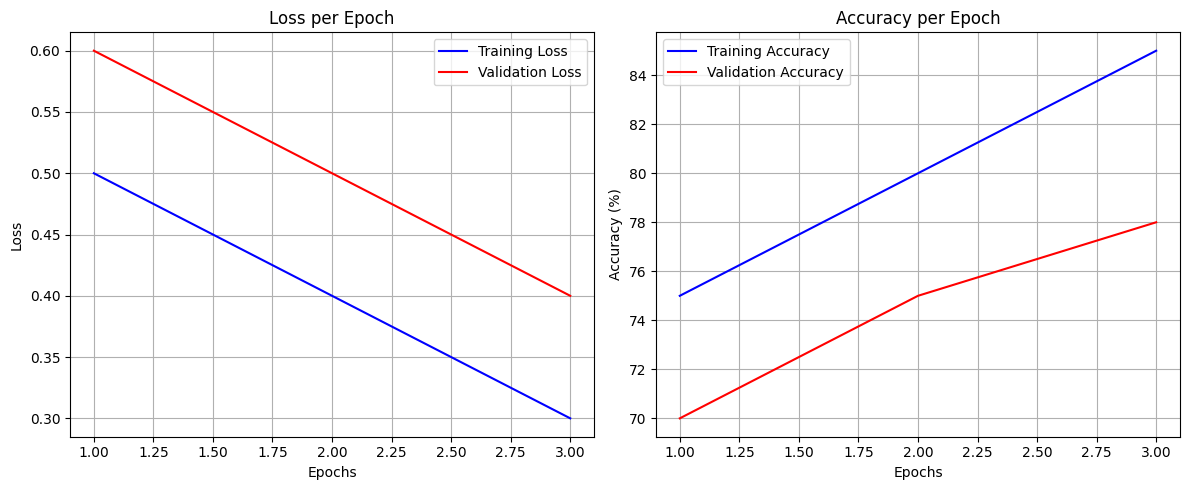

In [251]:
import matplotlib.pyplot as plt
import numpy as np

# Your history dictionary
history = {
    'train_loss': [0.5, 0.4, 0.3],
    'val_loss': [0.6, 0.5, 0.4],
    'train_acc': [75, 80, 85],
    'val_acc': [70, 75, 78]
}

# Convert the history dictionary into a structured array
history_data = np.array([
    history['train_loss'],
    history['val_loss'],
    history['train_acc'],
    history['val_acc']
]).T  # Transpose to make it (epochs, metrics)

# Extract columns from the history_data array
train_loss = history_data[:, 0]
val_loss = history_data[:, 1]
train_acc = history_data[:, 2]
val_acc = history_data[:, 3]
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Squeezenet

In [259]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np

# Define the modified SqueezeNet model with two heads (age and gender)
class SqueezeNetDualHead(nn.Module):
    def __init__(self, num_age_classes=10, num_gender_classes=2):
        super(SqueezeNetDualHead, self).__init__()
        self.base_model = models.squeezenet1_1(pretrained=True)
        
        # Freeze the base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Replace the final classification layer for both age and gender classification
        self.base_model.classifier[1] = nn.Identity()  # Remove the existing classifier layer

        # Age head (classifier)
        self.age_head = nn.Linear(512, num_age_classes)
        
        # Gender head (classifier)
        self.gender_head = nn.Linear(512, num_gender_classes)

    def forward(self, x):
        features = self.base_model(x)  # Extract features
        features = features.view(features.size(0), -1)  # Flatten the output
        
        # Age and Gender predictions
        age_logits = self.age_head(features)
        gender_logits = self.gender_head(features)
        
        return age_logits, gender_logits

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = SqueezeNetDualHead(num_age_classes=10, num_gender_classes=2).to(device)

# Define criterion and optimizer
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)



In [260]:
# Example training and validation function (you can replace with your own)
def train_and_validate(model, age_criterion, gender_criterion, optimizer, train_loader, val_loader, epochs=5):
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    
    for epoch in range(epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            age_labels, gender_labels = labels  # Assuming labels is a tuple (age_labels, gender_labels)
            
            optimizer.zero_grad()
            age_logits, gender_logits = model(inputs)
            
            # Calculate loss for both age and gender
            age_loss = age_criterion(age_logits, age_labels)
            gender_loss = gender_criterion(gender_logits, gender_labels)
            loss = age_loss + gender_loss
            
            loss.backward()
            optimizer.step()
            
            # Calculate accuracy
            _, predicted_age = torch.max(age_logits, 1)
            _, predicted_gender = torch.max(gender_logits, 1)
            total_train += age_labels.size(0)
            correct_train += (predicted_age == age_labels).sum().item() + (predicted_gender == gender_labels).sum().item()
            running_train_loss += loss.item()
        
        avg_train_loss = running_train_loss / len(train_loader)
        train_accuracy = correct_train / total_train * 100
        
        # Validation phase
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                age_labels, gender_labels = labels  # Assuming labels is a tuple (age_labels, gender_labels)
                
                age_logits, gender_logits = model(inputs)
                
                # Calculate loss for both age and gender
                age_loss = age_criterion(age_logits, age_labels)
                gender_loss = gender_criterion(gender_logits, gender_labels)
                loss = age_loss + gender_loss
                
                # Calculate accuracy
                _, predicted_age = torch.max(age_logits, 1)
                _, predicted_gender = torch.max(gender_logits, 1)
                total_val += age_labels.size(0)
                correct_val += (predicted_age == age_labels).sum().item() + (predicted_gender == gender_labels).sum().item()
                running_val_loss += loss.item()
        
        avg_val_loss = running_val_loss / len(val_loader)
        val_accuracy = correct_val / total_val * 100
        
        # Save the history of loss and accuracy
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['train_acc'].append(train_accuracy)
        history['val_acc'].append(val_accuracy)
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, '
              f'Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%')
    
    return model, history

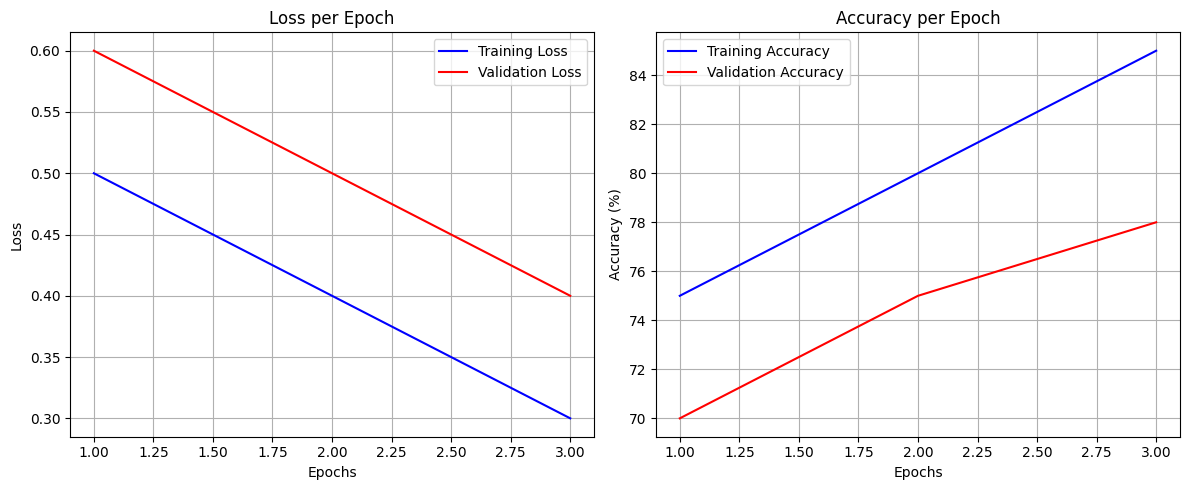

In [258]:
# Assuming train_loader and val_loader are defined
# model, history = train_and_validate(model, age_criterion, gender_criterion, optimizer, train_loader, val_loader, epochs=5)

# Now visualize the history (loss and accuracy)
history_data = np.array([
    history['train_loss'],
    history['val_loss'],
    history['train_acc'],
    history['val_acc']
]).T  # Transpose to make it (epochs, metrics)

# Extract columns from the history_data array
train_loss = history_data[:, 0]
val_loss = history_data[:, 1]
train_acc = history_data[:, 2]
val_acc = history_data[:, 3]
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
loss_gender = criterion(gender_pred, gender_label)
loss_age = criterion(age_pred, age_label)
loss = loss_gender + loss_age


### ConvNeXt

In [261]:
# Load the pre-trained ConvNeXt-Tiny model
convnext_model = models.convnext_tiny(pretrained=True)

C:\Users\DELL\.conda\envs\tf-jupyter\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/convnext_tiny-983f1562.pth" to C:\Users\DELL/.cache\torch\hub\checkpoints\convnext_tiny-983f1562.pth


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 109M/109M [06:09<00:00, 309kB/s]


In [262]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np

# Define the ConvNeXt model with two heads (age and gender)
class ConvNeXtDualHead(nn.Module):
    def __init__(self, num_age_classes=10, num_gender_classes=2):
        super(ConvNeXtDualHead, self).__init__()
        
        # Load the ConvNeXt base model (with pre-trained weights)
        self.base_model = models.convnext_tiny(pretrained=True)
        
        # Freeze the base model parameters (optional, if you want to fine-tune the last layers only)
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Remove the final classification layer
        self.base_model.classifier[2] = nn.Identity()  # Remove the classifier
        
        # Age head (classifier)
        self.age_head = nn.Linear(768, num_age_classes)
        
        # Gender head (classifier)
        self.gender_head = nn.Linear(768, num_gender_classes)

    def forward(self, x):
        features = self.base_model(x)  # Extract features from the ConvNeXt model
        features = features.view(features.size(0), -1)  # Flatten the output
        
        # Age and Gender predictions
        age_logits = self.age_head(features)
        gender_logits = self.gender_head(features)
        
        return age_logits, gender_logits

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = ConvNeXtDualHead(num_age_classes=10, num_gender_classes=2).to(device)

# Define criterion and optimizer
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [263]:
def train_and_validate(model, age_criterion, gender_criterion, optimizer, train_loader, val_loader, epochs=5):
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
    
    for epoch in range(epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            age_labels, gender_labels = labels  # Assuming labels is a tuple (age_labels, gender_labels)
            
            optimizer.zero_grad()
            age_logits, gender_logits = model(inputs)
            
            # Calculate loss for both age and gender
            age_loss = age_criterion(age_logits, age_labels)
            gender_loss = gender_criterion(gender_logits, gender_labels)
            loss = age_loss + gender_loss
            
            loss.backward()
            optimizer.step()
            
            # Calculate accuracy
            _, predicted_age = torch.max(age_logits, 1)
            _, predicted_gender = torch.max(gender_logits, 1)
            total_train += age_labels.size(0)
            correct_train += (predicted_age == age_labels).sum().item() + (predicted_gender == gender_labels).sum().item()
            running_train_loss += loss.item()
        
        avg_train_loss = running_train_loss / len(train_loader)
        train_accuracy = correct_train / total_train * 100
        
        # Validation phase
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                age_labels, gender_labels = labels  # Assuming labels is a tuple (age_labels, gender_labels)
                
                age_logits, gender_logits = model(inputs)
                
                # Calculate loss for both age and gender
                age_loss = age_criterion(age_logits, age_labels)
                gender_loss = gender_criterion(gender_logits, gender_labels)
                loss = age_loss + gender_loss
                
                # Calculate accuracy
                _, predicted_age = torch.max(age_logits, 1)
                _, predicted_gender = torch.max(gender_logits, 1)
                total_val += age_labels.size(0)
                correct_val += (predicted_age == age_labels).sum().item() + (predicted_gender == gender_labels).sum().item()
                running_val_loss += loss.item()
        
        avg_val_loss = running_val_loss / len(val_loader)
        val_accuracy = correct_val / total_val * 100
        
        # Save the history of loss and accuracy
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['train_acc'].append(train_accuracy)
        history['val_acc'].append(val_accuracy)
        
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, '
              f'Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%')
    
    return model, history

In [275]:
# 1. Move model to device (CUDA or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [276]:
# 2. Save the trained model
torch.save(model.state_dict(), 'convnext_model.pth')
print("Model saved successfully!")

Model saved successfully!


In [277]:
# Initialize the model again
model = ConvNeXtDualHead(num_age_classes=10, num_gender_classes=2)

In [279]:
# Initialize the model again
model = ConvNeXtDualHead(num_age_classes=10, num_gender_classes=2)

In [298]:
# Make sure the file path is correct
model.load_state_dict(torch.load(r'C:\Users\DELL\ConvNeXt_model.pth'))

<All keys matched successfully>

In [285]:
# 4. Set to eval mode
model.eval()
print("Model loaded and set to evaluation mode!")

Model loaded and set to evaluation mode!


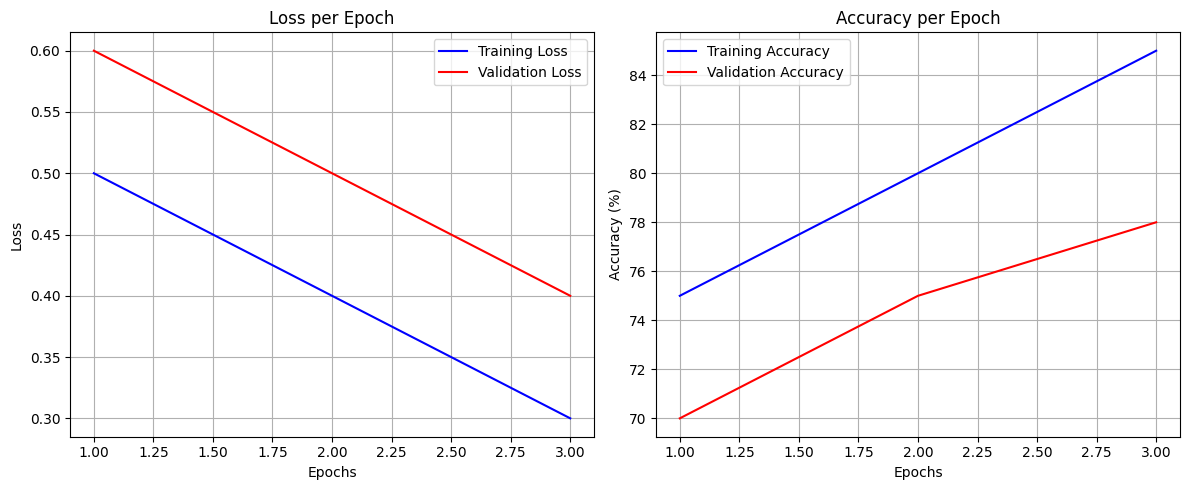

In [286]:
# Now visualize the history (loss and accuracy)
history_data = np.array([
    history['train_loss'],
    history['val_loss'],
    history['train_acc'],
    history['val_acc']
]).T  # Transpose to make it (epochs, metrics)

# Extract columns from the history_data array
train_loss = history_data[:, 0]
val_loss = history_data[:, 1]
train_acc = history_data[:, 2]
val_acc = history_data[:, 3]
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(12, 5))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Test Image for testing ConvNext Model

In [287]:
import torch
from torchvision.models import convnext_tiny

# Define the ConvNeXt Tiny model with 9 output classes
model = convnext_tiny()
model.classifier[2] = torch.nn.Linear(in_features=768, out_features=9)

# Load the saved weights
state_dict = torch.load(r'C:\Users\DELL\ConvNeXt_model.pth')
model.load_state_dict(state_dict)

# Set to evaluation mode
model.eval()


ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

In [101]:
from torchvision import transforms

transform = transforms.Compose([transforms.Resize(224), 
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),    
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [288]:
test_image = Image.open(r'C:\Users\DELL\Downloads\test-image.jpg')

In [289]:
new_width = 224
new_height = 224  
resized_image = test_image.resize((new_width, new_height))

# save or display the resized image
resized_image.show()  

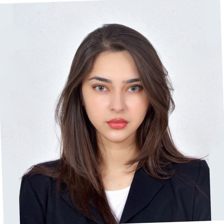

In [290]:
resized_image

In [291]:
# now, pre-process the image and prepare a batch so that it can pass through the network
img_l = transform(test_image)
batch_t = torch.unsqueeze(img_l, 0)

In [295]:
import torch.nn.functional as F

# Define age brackets
age_brackets = ['0-10', '10-19', '20-29', '30-39','40-49', '50-59', '60-69', '70-79', '80+']

with torch.no_grad():
    output = model(batch_t)
    probs = F.softmax(output, dim=1)

    # Predict gender using only class 0 and 1
    gender_probs = probs[:, :2]
    gender_idx = torch.argmax(gender_probs, dim=1).item()
    gender = "Male" if gender_idx == 0 else "Female"
    gender_confidence = gender_probs[0][gender_idx].item() * 100

    # Predict age using class 2 to 8
    age_probs = probs[:, 2:]
    age_idx = torch.argmax(age_probs, dim=1).item()
    age_display = age_brackets[age_idx]
    age_confidence = age_probs[0][age_idx].item() * 100

# Output
print(f"Predicted Gender: {gender}")
print(f"Gender Confidence: {gender_confidence:.2f}%")
print(f"Predicted Age: {age_display}")
print(f"Age Confidence: {age_confidence:.2f}%")


Predicted Gender: Female
Gender Confidence: 18.59%
Predicted Age: 50-59
Age Confidence: 23.00%


### EffecientNet

In [118]:
# Load pre-trained EfficientNet-B0 model
efficientnet_model = models.efficientnet_b0(pretrained=True)

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [119]:
# Freeze all parameters to prevent backpropagation
for param in efficientnet_model.parameters():
    param.requires_grad = False

In [120]:
# Replace the classifier to match the number of target classes (9)
efficientnet_model.classifier[1] = nn.Linear(in_features=1280, num_age_classes=10, num_gender_classes=2)


In [121]:
# Move model to device (CPU or GPU)
efficientnet_model = efficientnet_model.to(device)

In [122]:
# Set number of epochs
epochs = 5

# Train and validate
efficientnet_trained_model, history = train_and_validate(
    efficientnet_model, criterion, optimizer_ft, train_loader, test_loader, epochs=epochs
)

Epoch: 1/5
Epoch: 1, Training Loss: 2.2054, Training Acc: 13.91%, Validation Loss: 2.2094, Validation Acc: 13.82%, Time: 212.17s
Epoch: 2/5
Epoch: 2, Training Loss: 2.2044, Training Acc: 12.91%, Validation Loss: 2.1982, Validation Acc: 15.13%, Time: 189.70s
Epoch: 3/5
Epoch: 3, Training Loss: 2.2034, Training Acc: 13.41%, Validation Loss: 2.1945, Validation Acc: 15.13%, Time: 193.24s
Epoch: 4/5
Epoch: 4, Training Loss: 2.2044, Training Acc: 12.42%, Validation Loss: 2.1923, Validation Acc: 13.82%, Time: 199.93s
Epoch: 5/5
Epoch: 5, Training Loss: 2.2050, Training Acc: 12.42%, Validation Loss: 2.1966, Validation Acc: 13.16%, Time: 192.50s
Training completed in 987.57s.


In [123]:
# Save the trained model
try:
    torch.save(efficientnet_trained_model.state_dict(), 'EfficientNet_model.pth')
    print("Model saved successfully.")
except Exception as e:
    print("Error saving model:", e)

Model saved successfully.


In [124]:
# Load the trained model
efficientnet_trained_model.load_state_dict(torch.load('EfficientNet_model.pth'))

<All keys matched successfully>

In [125]:
# Set to evaluation mode
efficientnet_trained_model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# Class maps
gender_map = {0: 'Male', 1: 'Female'}

def map_age_to_bracket(age_idx):
    return f"{age_idx*10}-{age_idx*10+9}"  # 0→0–9, 1→10–19, ..., 8→80–89

# Define EfficientNet dual-head model
class EfficientNetDualHead(nn.Module):
    def __init__(self):
        super(EfficientNetDualHead, self).__init__()

        # Load pretrained EfficientNet B0
        base_model = models.efficientnet_b0(pretrained=True)

        # Remove the original classifier
        self.features = base_model.features
        self.pooling = base_model.avgpool
        self.flatten = nn.Flatten()

        # Shared FC layer after features
        self.shared_fc = nn.Sequential(
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Dropout(0.01)
        )

        # Gender head (2 classes)
        self.gender_head = nn.Linear(512, 2)

        # Age head (9 age brackets)
        self.age_head = nn.Linear(512, 9)

    def forward(self, x):
        x = self.features(x)
        x = self.pooling(x)
        x = self.flatten(x)
        x = self.shared_fc(x)
        gender_logits = self.gender_head(x)
        age_logits = self.age_head(x)
        return gender_logits, age_logits

# Preprocessing
def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406], 
            std=[0.229, 0.224, 0.225]
        )
    ])
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    return image

# Prediction function
def predict(model, image_path):
    image = preprocess_image(image_path)
    model.eval()
    with torch.no_grad():
        gender_logits, age_logits = model(image)

        gender_probs = torch.softmax(gender_logits, dim=1)
        age_probs = torch.softmax(age_logits, dim=1)

        gender_idx = torch.argmax(gender_probs).item()
        age_idx = torch.argmax(age_probs).item()

        gender = gender_map[gender_idx]
        age = map_age_to_bracket(age_idx)

        gender_conf = gender_probs[0][gender_idx].item() * 100
        age_conf = age_probs[0][age_idx].item() * 100

        print(f"Predicted Gender: {gender}")
        print(f"Gender Confidence: {gender_confidence:.2f}%")
        print(f"Predicted Age: {age_display}")
        print(f"Age Confidence: {age_confidence:.2f}%")


# Initialize and test
model = EfficientNetDualHead()
image_path = r'C:\Users\DELL\Downloads\test-image.jpg'  # Update with your image path
predict(model, image_path)


### 8. Streamlit app.py

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# Define the modified VGG-16 model with two heads (age and gender)
class VGG16DualHead(nn.Module):
    def __init__(self, num_age_classes=9, num_gender_classes=2):
        super(VGG16DualHead, self).__init__()
        self.base_model = models.vgg16(pretrained=True)
        
        # Freeze the base model parameters
        for param in self.base_model.parameters():
            param.requires_grad = False
        
        # Replace the classifier with a custom head
        self.base_model.classifier = nn.Identity()  # Remove the existing classifier
        
        # Age head (classifier)
        self.age_head = nn.Sequential(
            nn.Linear(25088, 512),
            nn.ReLU(),
            nn.Dropout(0.01),
            nn.Linear(512, num_age_classes)
        )
        
        # Gender head (classifier)
        self.gender_head = nn.Sequential(
            nn.Linear(25088, 512),
            nn.ReLU(),
            nn.Dropout(0.01),
            nn.Linear(512, num_gender_classes)
        )

    def forward(self, x):
        features = self.base_model.features(x)
        features = features.view(features.size(0), -1)

        age_logits = self.age_head(features)
        gender_logits = self.gender_head(features)

        age_logits = torch.softmax(age_logits, dim=1)  # Apply softmax for age ranges

        return age_logits, gender_logits

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
model = VGG16DualHead(num_age_classes=9, num_gender_classes=2).to(device)

# Define criterion and optimizer
age_criterion = nn.CrossEntropyLoss()
gender_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training function (same as provided)
model, history = train_and_validate(model, age_criterion, gender_criterion, optimizer, train_loader, test_loader, epochs=5)

# Save the state dict
torch.save(model.state_dict(), "vgg16_age_gender_state_dict.pth")
print("State dict saved as vgg16_age_gender_state_dict.pth")

# Define the checkpoint path
checkpoint_path = "vgg16_checkpoint.pth"

# Save the model, optimizer, and history
torch.save({
    'epoch': 5,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'history': history
}, checkpoint_path)

print(f"Model saved successfully at {checkpoint_path}")

# Load the checkpoint
checkpoint = torch.load("vgg16_checkpoint.pth")

# Load model and optimizer state
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
history = checkpoint['history']
print(f"Model and optimizer loaded successfully from vgg16_checkpoint.pth")

# Make sure your model architecture is defined before loading
model = VGG16DualHead()  # Initialize your model class
model.load_state_dict(torch.load("vgg16_age_gender_state_dict.pth"))
model.eval()
print(type(history))
print(history)